In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("ushape.csv", header=None)
df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


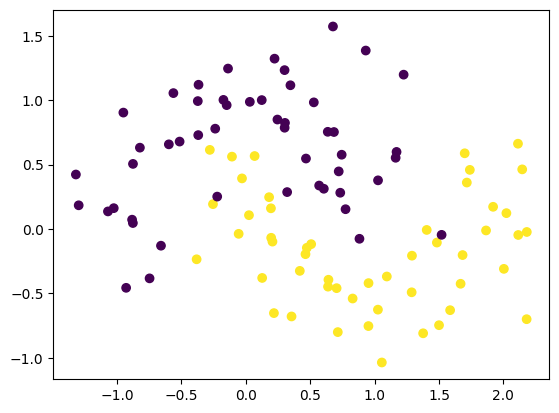

In [4]:
plt.scatter(df[0],df[1],c=df[2])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\vikas\OneDrive\Desktop\Deep-Learning-CampusX\campus\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.get_weights()

[array([[ 0.6361363 , -0.86232114,  0.3597319 , -0.2803506 , -1.0171243 ,
          1.6372715 ,  1.2594676 ,  0.57734996, -0.30384508, -1.1812353 ],
        [ 0.29760584, -2.031428  ,  2.2288876 ,  0.18215552,  0.33820686,
         -1.814482  , -0.12180759, -0.00677345,  0.8454188 ,  1.8863608 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.43693617,  0.9684936 ,  0.8945243 ,  0.67308074, -0.17269969,
          0.6326218 ,  0.09540628, -0.20766027, -0.70340055,  0.32375875],
        [-0.04139892,  0.6492541 , -0.79224586,  0.53806555,  0.04657289,
         -0.00201868,  0.8367923 , -0.16840458, -0.45201644, -0.44059116],
        [ 0.2531067 , -0.22379951,  0.27299342,  0.05327814,  0.5951814 ,
         -0.47619358,  0.36277223, -0.1319562 , -0.34864375, -0.85486066],
        [ 0.02377803, -0.73293585, -0.9300401 ,  0.8866678 ,  0.7773973 ,
         -0.1539016 ,  0.11949832, -0.50886184,  0.28006938, -0.22794083],
        [ 0.04653

In [9]:
initial_weights = model.get_weights()

In [10]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [11]:
model.set_weights(initial_weights)

In [12]:
model.get_weights()

[array([[-0.16632149,  0.3472985 ,  0.55600774,  0.12110814,  0.06898525,
          1.0777396 , -0.31686887,  0.44535854,  0.30122268,  1.0059366 ],
        [-1.2527752 , -1.3043385 ,  0.09134086,  0.36939964, -0.05030522,
         -0.24319954,  0.09604862, -0.2951799 ,  1.0500032 , -1.1801637 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.3469912 , -0.45104834,  0.05890155,  0.29905844, -0.03694284,
         -0.35793588,  0.03170497, -0.47479874, -0.3039323 , -0.09732691],
        [ 0.4173771 , -0.37083924,  0.07361792,  0.09568799, -0.01084557,
         -0.29224873,  0.01634554,  0.08993521, -0.44372362,  0.13692062],
        [-0.43456718,  0.56110466, -0.32519808, -0.12369694, -0.10718066,
          0.5287064 ,  0.3633693 , -0.2377679 ,  0.08374617, -0.12222169],
        [ 0.5125489 , -0.14213112, -0.22585046, -0.04251911,  0.16848302,
         -0.02062692, -0.20536713, -0.5564147 , -0.29282677, -0.1857236 ],
        [-0.34282

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.7469 - loss: 0.6675 - val_accuracy: 0.7500 - val_loss: 0.6653
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7703 - loss: 0.6633 - val_accuracy: 0.7500 - val_loss: 0.6612
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7703 - loss: 0.6608 - val_accuracy: 0.7500 - val_loss: 0.6570
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7828 - loss: 0.6563 - val_accuracy: 0.8000 - val_loss: 0.6527
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8031 - loss: 0.6543 - val_accuracy: 0.9000 - val_loss: 0.6480
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8406 - loss: 0.6437 - val_accuracy: 0.9000 - val_loss: 0.6430
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8523 - loss: 0.6388 - val_accuracy: 0.9000 - val_loss: 0.6378
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8586 - loss: 0.6353 - val_accuracy: 0.9000 - val_loss

In [15]:
model.get_weights()

[array([[-0.00507215,  0.5439891 ,  0.6346897 ,  0.09262804,  0.01311376,
          1.1957988 , -0.5031693 ,  0.50523305,  0.23396038,  1.1260685 ],
        [-1.4477781 , -1.4357079 ,  0.30273354,  0.24857812, -0.00497801,
         -0.39707693, -0.06720459, -0.14559041,  1.2484902 , -1.3768195 ]],
       dtype=float32),
 array([ 0.0910704 ,  0.17570984, -0.10784527, -0.11000562, -0.05317561,
         0.14335626, -0.01703672, -0.05086337,  0.08812477,  0.1750495 ],
       dtype=float32),
 array([[ 0.5854526 , -0.46296626,  0.01892892,  0.42086148,  0.14637005,
         -0.35793588,  0.13172844, -0.26068658, -0.18798879,  0.10857154],
        [ 0.55447465, -0.30352023, -0.01752205,  0.26996568,  0.15833054,
         -0.29224873,  0.02132331,  0.16903672, -0.63073266,  0.28641203],
        [-0.4244261 ,  0.634099  , -0.2038101 ,  0.0102839 , -0.04636387,
          0.5287064 ,  0.5181416 , -0.36965564,  0.17570929, -0.05674997],
        [ 0.5956866 , -0.02513895, -0.04857329,  0.18437771, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

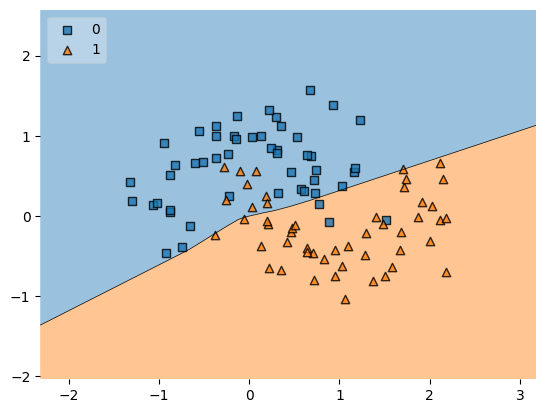

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [17]:
(np.random.randn(10,10)*0.01).min()

np.float64(-0.021862874069015378)

In [18]:
(np.random.randn(10,10)*0.01).max()

np.float64(0.029573812094438084)

In [19]:
print("The End")

The End
